<a href="https://colab.research.google.com/github/Atharv24-Atreus/Pattern_Recogination-/blob/main/PatternExp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
        Person ID

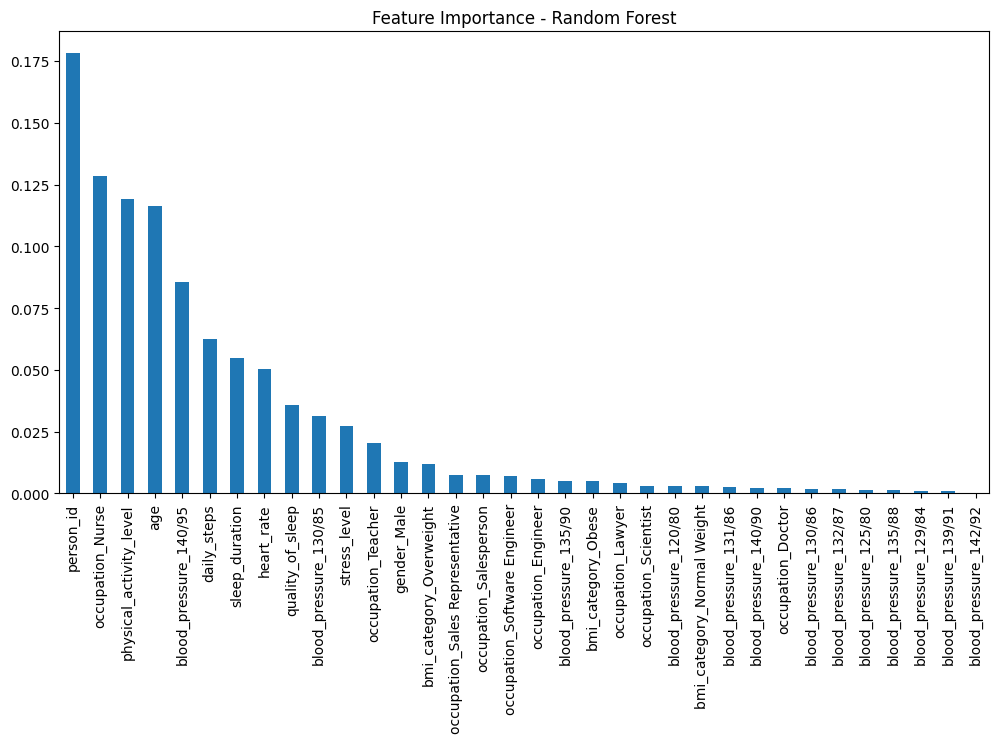

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Data Cleaning
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert categorical variables into numeric
if df.select_dtypes(include=['object']).shape[1] > 0:
    df = pd.get_dummies(df, drop_first=True)

# Identify correct target column automatically if it starts with 'sleep_disorder'
target_cols = [col for col in df.columns if col.startswith('sleep_disorder')]
if not target_cols:
    raise KeyError(f"No column starting with 'sleep_disorder' found in dataset. Available columns: {df.columns}")

target_col = target_cols[0]  # use the first match (e.g., 'sleep_disorder_Sleep Apnea')

# Define features and target variable
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance - Random Forest')
plt.show()
